# Week5 : Tree Based Methods

### Objectives
This homework sheet will help reviewing the basic concepts associated with tree-based methods and provide a basic introduction to the ML workflow using real-world datasets. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

The following website has access to the relevant datasets from the recommended textbook: https://book.huihoo.com/introduction-to-statistical-learning/data.html

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| 1     | 3      |
| 2     | 3     |
| 3a     | 2     |
| 3b     | 2     |
| 3c     | 5     |

# Questions

Conceptual


Q1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below.


**Please note: You can use Microsoft word / any editor or draw the image by hand, you can upload the image / screenshot  to colab file using insert image option in text cell**


ANSWER in the markdown cell

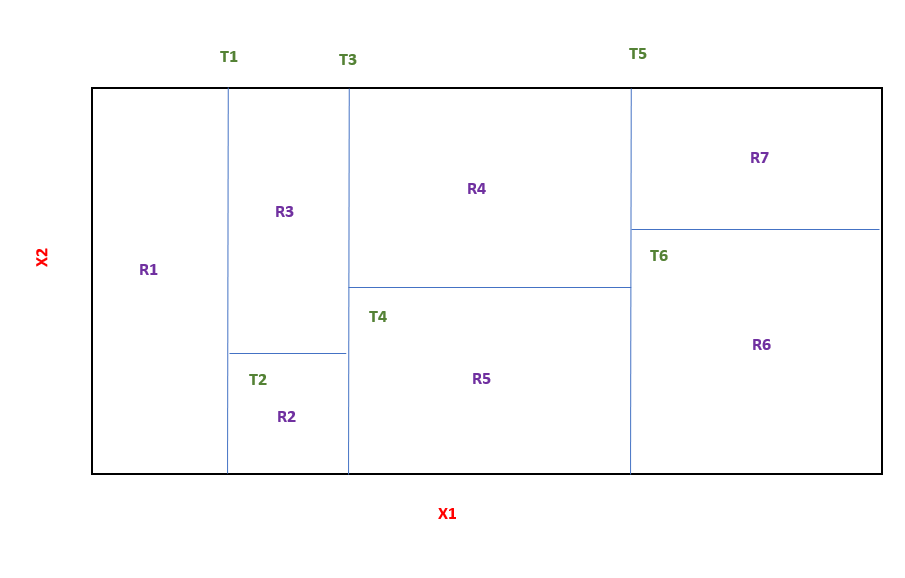

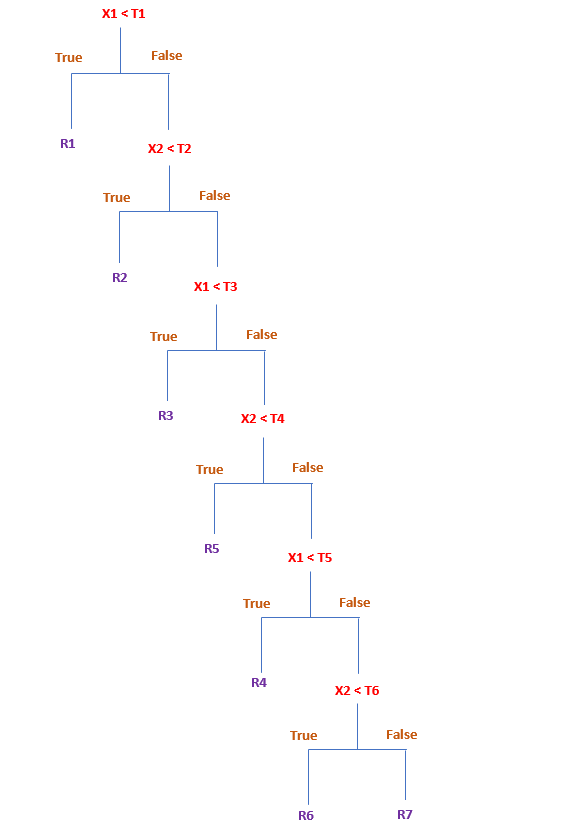

Q2. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach , the second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

ANSWER in the markdown cell

To determine the final classification under each of these two approaches, let's analyze the provided estimates of \( P(ClassisRed|X) \).

Given values:
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75

1. **Majority Vote Approach**:
   
   For majority vote, we'll classify each bootstrapped sample prediction as either 'Red' or 'Green' based on a threshold of 0.5 for the probability. If \( P(ClassisRed|X) \) is greater than or equal to 0.5, the prediction is 'Red', otherwise it's 'Green'.

   - 'Green': 0.1, 0.15, 0.2, 0.2 (4 votes)
   - 'Red': 0.55, 0.6, 0.6, 0.65, 0.7, 0.75 (6 votes)

   The majority is 'Red' with 6 out of 10 votes.

2. **Average Probability Approach**:

   We take the average of the 10 probabilities:

   - Average = (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75)/10

   - Average = (4.5)/10
   
   - Average = 0.45

   Since the average probability is 0.45 (which is less than 0.5), the classification is 'Green'.

**Conclusion**:

- Under the majority vote approach, the final classification is 'Red'.
- Under the average probability approach, the final classification is 'Green'.

# APPLIED

Q3. Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets from ISLR dataset link provided ( https://book.huihoo.com/introduction-to-statistical-learning/data.html ) to examine any of the questions that were discussed in any of the previous homeworks. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

#### ANSWER



In [1]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

####a) Read the dataset using function read_csv( ) from pandas library and preprocess the data if required ( check for any missing values etc )



In [2]:
#Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset

url = '/content/drive/MyDrive/AIML/Auto.csv'
data = pd.read_csv(url)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Check for missing data
print(data.isnull().sum())  # Check for missing values in each column

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [7]:
# Handle missing data and convert '?' to Mode of Horsepower
data = data.replace('?', data['horsepower'].mode()[0])

In [8]:
# Convert data types (if applicable)
data['horsepower'] = data['horsepower'].astype(np.float64)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### b) Split the data into train data  and test data ( proportion of train and test data of your choice )

Reference :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [11]:
# Splitting the dataset into train and test sets
X = data.drop('mpg', axis=1).select_dtypes(['number'])  # considering only numeric variables
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (317, 7)
X_test shape: (80, 7)
y_train shape: (317,)
y_test shape: (80,)


####c) Train the data on the below models

i) Linear regression model
ii) Gradient boosting model
iii) Random forest model

check the train and test r2 score and mention your findings on which model performed better in terms of underfitting / overfitting etc

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

i) Linear regression model

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_score = r2_score(y_train, lr.predict(X_train))
lr_test_score = r2_score(y_test, lr.predict(X_test))

print(f"Linear Regression - Train R2 Score: {lr_train_score}")
print(f"Linear Regression - Test R2 Score: {lr_test_score}")

Linear Regression - Train R2 Score: 0.8273716501726909
Linear Regression - Test R2 Score: 0.7863415032555839


ii) Gradient boosting model (We will use GradientBoostingRegressor since the target variable is continuous)

In [14]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_train_score = r2_score(y_train, gbr.predict(X_train))
gbr_test_score = r2_score(y_test, gbr.predict(X_test))

print(f"Gradient Boosting Regressor - Train R2 Score: {gbr_train_score}")
print(f"Gradient Boosting Regressor - Test R2 Score: {gbr_test_score}")

Gradient Boosting Regressor - Train R2 Score: 0.9767611435995653
Gradient Boosting Regressor - Test R2 Score: 0.8104312778953204


iii) Random forest model (Using RandomForestRegressor for regression task)

In [15]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_train_score = r2_score(y_train, rfr.predict(X_train))
rfr_test_score = r2_score(y_test, rfr.predict(X_test))

print(f"Random Forest Regressor - Train R2 Score: {rfr_train_score}")
print(f"Random Forest Regressor - Test R2 Score: {rfr_test_score}")

Random Forest Regressor - Train R2 Score: 0.9841515420609512
Random Forest Regressor - Test R2 Score: 0.8129474615798019


### Let's analyze the results:

**Linear Regression**
- **Train R2 Score**: 0.8274
- **Test R2 Score**: 0.7863

**Gradient Boosting Regressor**
- **Train R2 Score**: 0.9768
- **Test R2 Score**: 0.8104

**Random Forest Regressor**
- **Train R2 Score**: 0.9842
- **Test R2 Score**: 0.8129

### Analysis:

**Linear Regression**
- The train and test R2 scores are quite close, implying that the model generalizes well to the unseen data without overfitting or underfitting.
- With an R2 score close to 0.8, the model decently captures the variance in the data, though enhancements could further optimize its performance.

**Gradient Boosting Regressor**
- The high training R2 score suggests an exceptional fit to the training data.
- While the test R2 score is higher than the Linear Regression model, the noticeable gap from the training R2 score indicates some degree of overfitting. Yet, when compared with the Random Forest model, the Gradient Boosting Regressor is overfitting slightly less.

**Random Forest Regressor**
- With an elevated training R2 score, the Random Forest model demonstrates a nearly perfect fit on the training set.
- The test R2 score, although marginally higher than the Gradient Boosting Regressor, is accompanied by a more significant gap from the training R2 score, hinting at overfitting. Nevertheless, the Random Forest Regressor offers the best test performance among the three models.

### Conclusion:

**Linear Regression**:
- The Linear Regression model remains a consistent reference, showing neither pronounced underfitting nor overfitting. Its performance is relatively good, considering its simplicity.

**Gradient Boosting Regressor**:
- The Gradient Boosting Regressor, while exhibiting some overfitting, does so to a slightly lesser extent than the Random Forest model. Its performance on the test data is commendable but slightly overshadowed by the Random Forest Regressor.

**Random Forest Regressor**:
- The Random Forest Regressor, although hinting at overfitting, delivers the best performance on the test set among the three models. However, its overfitting margin is more than the Gradient Boosting Regressor.

In terms of sheer performance on unseen data, the Random Forest Regressor narrowly edges out. However, for scenarios that prioritize model simplicity for easier interpretation, quicker predictions, or to avoid intricacies, the Linear Regression remains a viable choice.

To counter overfitting in ensemble models, consider:
- Hyperparameter adjustments such as tree depth, number of trees, or boosting's learning rate.
- Incorporating more data, if available.
- Employing cross-validation for a more rigorous model evaluation.
- Applying regularization techniques tailored for tree-based models.

While the R2 score is invaluable for a quick performance glimpse, it's crucial to explore additional metrics, scrutinize residuals, and integrate domain-specific insights for a comprehensive model assessment and selection.

---

In [16]:
!pip install nbconvert

In [17]:
#!jupyter nbconvert --to html /content/UoA_Course_3_Assignment_1_Week_5_Learner_template.ipynb